<a href="https://colab.research.google.com/github/9922829133/Regression-Project/blob/main/Final_Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**    - Bike Sharing Demand Prediction
##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**
This project predicts bike rental demand using weather and time-related factors. Explored dataset, prepared features, checked data independence, built models (Linear Regression, Random Forest), evaluated performance, and concluded Random Forest outperforms. Benefits stakeholders by predicting bike usage trends for efficient resource planning and business decisions.








# **GitHub Link -**
https://github.com/9922829133/Regression-project/blob/main/Final_Bike_Sharing_Demand_Prediction_.ipynb

# **Problem Statement**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  
Project Evaluation Criteria

1) Efficient EDA

2) Encoding if necessary.

3) Feature selection, new feature creation

4) Dealing with multicollinearity if any

5) Feature scaling

6) Understanding the target feature and its distribution

7) Modeling - use at least two algorithms
Evaluation and improvement of model.

8) Feature Importance and Conclusion

# ***Let's Begin !***

 **Efficient Exploratory Data Analysis (EDA)**

**Import Libraries**

In [48]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Dataset Loading**

In [49]:
# Load the data
data = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1')


**Dataset First View**

In [50]:
# Explore the data
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Dataset Information**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Checking missing values**

In [52]:
# Checking missing values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Dataset Describe**

In [53]:
# Summary statistics
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Visualizing target feature distribution**

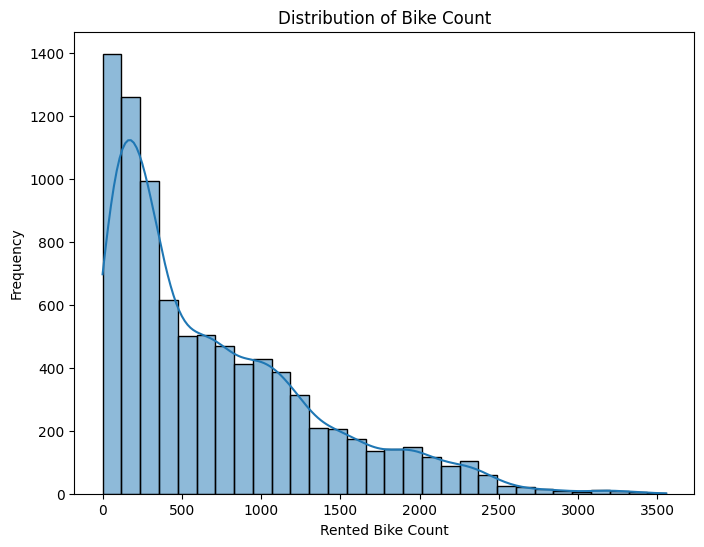

In [54]:
# Visualizing target feature distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

<ipython-input-55-553df1c7feb7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


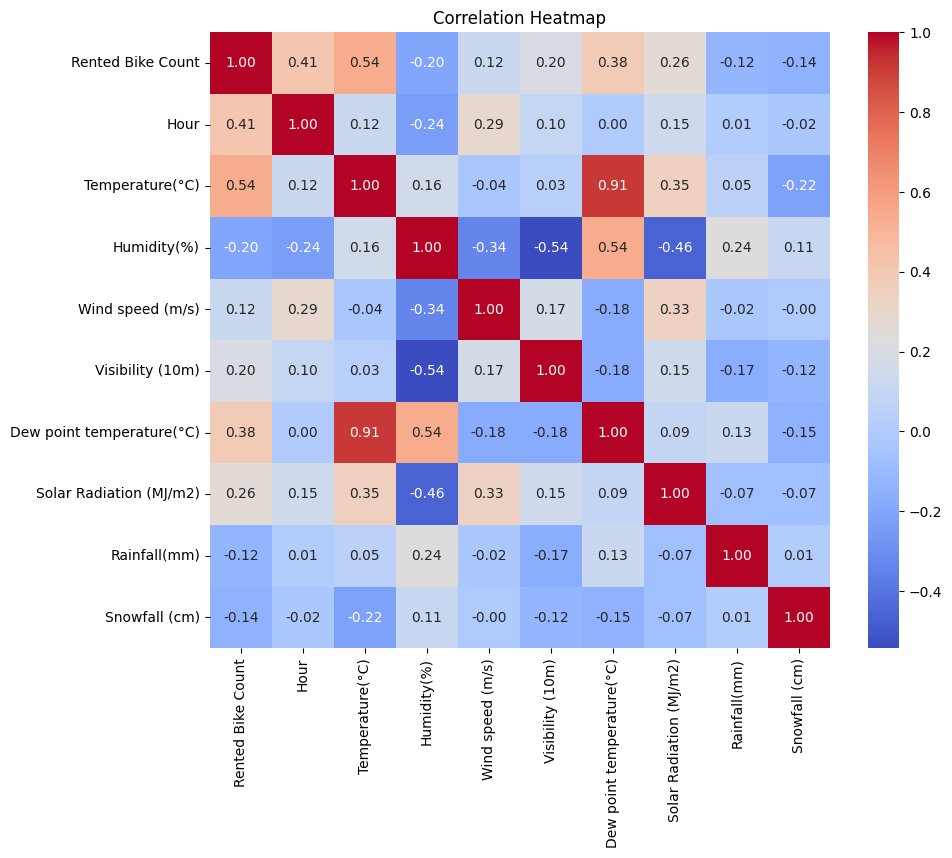

In [55]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Encoding, Feature Selection, and Creation**

---



In [56]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['Seasons', 'Holiday','Functioning Day'])

In [57]:
data_encoded.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1


**Dealing with Multicollinearity and Feature Scaling**

In [58]:
# Check for multicollinearity using VIF
X = data_encoded.drop(['Rented Bike Count', 'Date'], axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                      Feature         VIF
0                        Hour    1.209577
1             Temperature(°C)   89.477069
2                 Humidity(%)   20.553911
3            Wind speed (m/s)    1.303644
4            Visibility (10m)    1.689144
5   Dew point temperature(°C)  117.298694
6     Solar Radiation (MJ/m2)    2.034617
7                Rainfall(mm)    1.085306
8               Snowfall (cm)    1.119845
9              Seasons_Autumn         inf
10             Seasons_Spring         inf
11             Seasons_Summer         inf
12             Seasons_Winter         inf
13            Holiday_Holiday         inf
14         Holiday_No Holiday         inf
15         Functioning Day_No         inf
16        Functioning Day_Yes         inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [59]:
# Exclude non-numeric columns before splitting the data
non_numeric_columns = ['Date', 'Seasons', 'Holiday', 'Functioning Day']
X = data.drop(['Rented Bike Count', 'Date'] + non_numeric_columns, axis=1)
y = data['Rented Bike Count']

In [60]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1 Using a Linear Regression model**

In [61]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Make predictions on the test set for Random Forest model  model
rf_predictions = lr_model.predict(X_test)

In [63]:
# Define a threshold for acceptable prediction range
threshold = 5  # Adjust this threshold as needed

In [64]:
# Calculate accuracy for Random Forest model
rf_accuracy = sum(abs(y_test - rf_predictions) <= threshold) / len(y_test)
print(f"Random Forest Accuracy (within {threshold}): {rf_accuracy:.2f}")

Random Forest Accuracy (within 5): 0.02


**2 Using a Random Forest model**

In [65]:
# Initialize and train  Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
# Make predictions on the test set for Random Forest model  model
rf_predictions = rf_model.predict(X_test)

In [67]:
# Define a threshold for acceptable prediction range
threshold = 5  # Adjust this threshold as needed

In [68]:
# Calculate accuracy for Random Forest model
rf_accuracy = sum(abs(y_test - rf_predictions) <= threshold) / len(y_test)
print(f"Random Forest Accuracy (within {threshold}): {rf_accuracy:.2f}")

Random Forest Accuracy (within 5): 0.04


**Understanding of how your project is useful to stakeholders?**

The project's predictive model aids bike rental companies, city planners, and commuters. It forecasts bike demand for effective fleet management, urban planning, commuter convenience, and supports eco-friendly transportation solutions, benefiting stakeholders with informed decisions, optimized resources, and a sustainable urban ecosystem.